# Group project 1 - Conway's Game of Life
## Due January 24th, 10:30 AM

Conway's Game of Life is a "no-player never-ending game" played on board of squares.  It was invented by [John Conway](https://www.theguardian.com/science/2015/jul/23/john-horton-conway-the-most-charismatic-mathematician-in-the-world) in 1968, out of a desire to create a demonstration of how simple rules might lead to complex behavior, much like how relatively simple physical processes generated all of earth's complicated biodiversity, at least in microcosmic sense.  For our purposes, it will yield a fun and interesting starting point for practicing some useful python skills prior to diving into some more mathematical topics.  

The rules of the game are simple, and we'll develop them sequentially.  We begin by defining a rectangular board of cells, each of which can be either "alive" or "dead".  A good size to begin with is 10x10.  The best way to store this board is as a numpy array.  **Import numpy and create the board, with all positions initially set to "dead" (or false, as the case may be).**

In [3]:
import numpy as np

# Create a boolean numpy array to act as the board here, and initialize it to all false values.  You
# may find the commands np.zeros and the array's astype method to be useful here

initial = np.full((5, 5), False)
initial

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

Now that we have the board, the next thing that we'll need to do is to define our initial configuration, or *state*.  While we will change this in the future, set a line of three adjacent cells either vertically or horizontally in the middle of the board.  You can use numpy's array indexing for this, e.g. if you wanted to initialize a 2x2 square with corner at position i=2,j=2, you could set S[2:4,2:4]=True, if S is the name of your board.

In [4]:
initial[2,4]=True
initial[2,0]=True
initial[2,1]=True
initial

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [ True,  True, False, False,  True],
       [False, False, False, False, False],
       [False, False, False, False, False]])

Now we get to the rules of the game.  Life is a dynamical system, which is to say that 
$$
S_{t+1} = F(S_t)
$$
or the next board state is a function of the current board state, where $S_t$ is the board state at an integer "time" $t$.  The rules that define $F$ are simple, and here we'll just state them in words rather than in equations.
 - If a cell is currently alive, and it has two or three neighbors (out of eight possible) that are also alive, then it remains alive.
 - If a cell is dead, but has three neighbors (out of eight possible) that are alive, then it becomes alive.
 - All other cells become or remain dead.  
 
It's also necessary to consider what happens at the edges of the domain.  You should use *periodic boundary conditions*, which is to say that if you are considering the neighbors of a cell that exists, for example on the right edge of the board, you would count its five neighboring cells on the rights side of the board, and also three cells on the left edge (and vice versa.  And analogously for the top and bottom).  **Create a python function that takes as an argument the existing board state and returns a new board state based on the rules described above.  Try to make this function as efficient as possible!** 

In [5]:
def update_board(S):
    sz = len(S)
    S_new = np.full((sz, sz), False)
    S = np.vstack((S[sz-1,:],S,S[0,:]))
    S = np.hstack((S[:,sz-1].reshape(sz+2,1), S, S[:,0].reshape(sz+2,1)))
    for i in range(1,sz+1):
        for j in range(1,sz+1):
            count = 0
            for cell in np.nditer(S[i-1:i+2, j-1:j+2]):
                 if cell:
                      count += 1
            if S[i,j]:
                count -= 1
                if count == 2 or count == 3:
                    S_new[i-1,j-1] = True
            elif count == 3:
                    S_new[i-1,j-1] = True
    return S_new

updated = update_board(initial)
updated

array([[False, False, False, False, False],
       [ True, False, False, False, False],
       [ True, False, False, False, False],
       [ True, False, False, False, False],
       [False, False, False, False, False]])

Do a basic test of your function to ensure correctness.  The reason that I asked you to create a line of three pixels is because the rules above lead to a very simple transformation: a vertical line becomes a horizontal line, and a horizontal line becomes a vertical line.  It will be helpful to visualize this.  **Use matplotlib to visualize your board state both before and after application of the update_board function.** 

In [6]:
import matplotlib.pyplot as plt

# plt.imshow is a particularly useful command for this

fig, axisArr = plt. subplots(1, 3)
plt.setp(axisArr, xticks=np.arange(len(initial)), yticks=np.arange(len(initial)))
axisArr[0].imshow(initial, interpolation='nearest')
axisArr[1].imshow(updated, interpolation='nearest')
axisArr[2].imshow(update_board(updated), interpolation='nearest')

While this is interesting, the real fascinating dynamics of Conway's Game of Life emerge when the update_board function is iterated from time $t=0$ to $t=T$.  Write a for loop that performs this iteration and saves the output at each step to a list.  One common gotcha is that if you append your state array to a list, you may end up with $T$ references to the same array, which of course is being updated.  This is not what you want.  Be sure you save the board state at time $t$ by using a function such as np.copy prior to appending it.  Try running the code for 20 steps.  

In [7]:
states = [initial]
board = initial
for i in range(20):
    updated = update_board(board)
    states.append(np.copy(updated))
    board = updated

It would be unwieldy to visualize each of the states of a time-evolving system individually.  A much more natural way of looking at them is to create an animation.  There are many ways to do this, but one nice way is to use the matplotlib FuncAnimation method.  All you need to do is to create an animate function, which takes as argument the frame number and updates a matplotlib plot.  Note that we need to put jupyter into matplotlib notebook mode to make this work (if we ran this code in a normal python interpreter, this wouldn't be required).  It's easier to show than to tell:

<IPython.core.display.Javascript object>


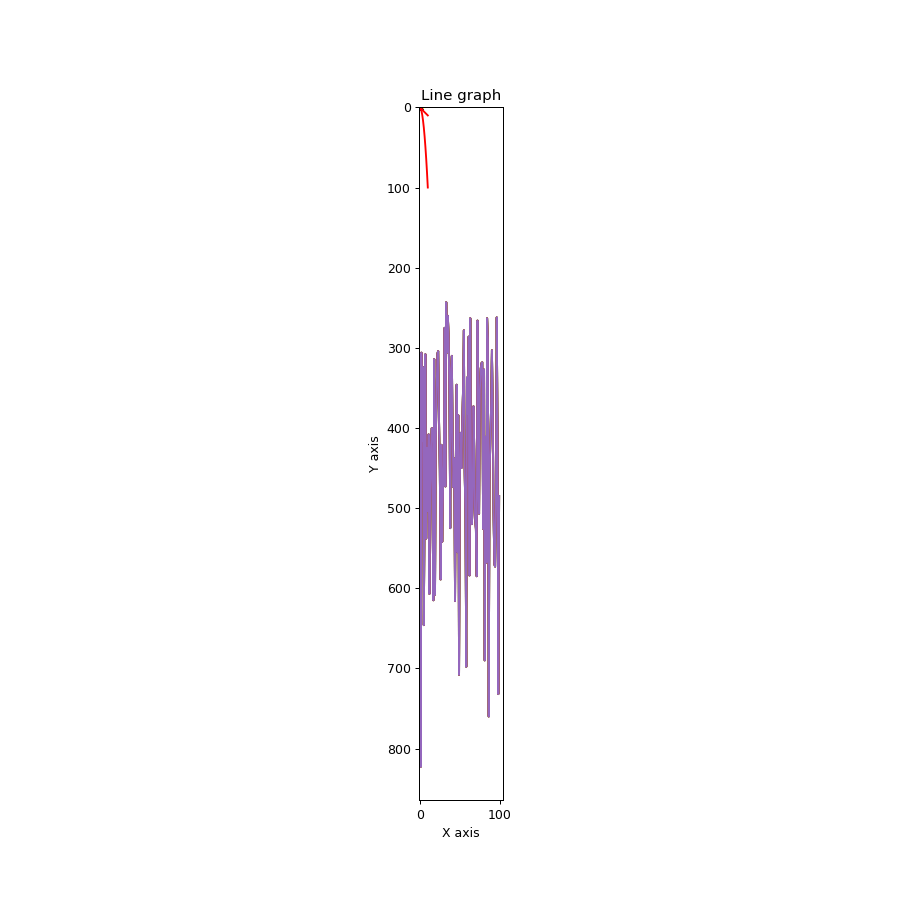

In [8]:
import matplotlib.animation as anim
%matplotlib notebook

fig,ax = plt.subplots()
fig.set_size_inches(10,10)

im = ax.imshow(states[0])

def animate(frame_number):
    im.set_data(states[frame_number])
    return im
    
animation = anim.FuncAnimation(fig, animate, frames=len(states), interval=100)
plt.show()

Feel free to modify the parameters of the animate function, but if all has gone well, what you should be seeing is an oscilllating vertical and horizontal line of 3 pixels.  This isn't a very exciting result, but it should ensure that your code is running correctly. 

Now, let's do something more interesting.  Instead of a line, let's try as an initial state the R-pentomino, which would be
![pentomino](pentomino.png)
**Create a method that initializes the board state to one R-pentomino in the middle.  Rerun the above analysis and write a short qualitative characterization of the types of patterns that appear**.  If you wish, you can make the board larger, say size 100x100 and run the simulation for longer to get a better sense of the results.  

In [9]:
# this function doesn't work for some reason i won't worry about. don't use
def generateSimulation(initial, steps=50):
    states = [initial]
    board = initial
    for i in range(steps):
        updated = update_board(board)
        states.append(np.copy(updated))
        board = updated

    fig,ax = plt.subplots()
    fig.set_size_inches(5,5)

    im = ax.imshow(states[0])

    def animate(frame_number):
        im.set_data(states[frame_number])
        return im

    animation = anim.FuncAnimation(fig, animate, frames=len(states), interval=100)
    plt.show()

<IPython.core.display.Javascript object>


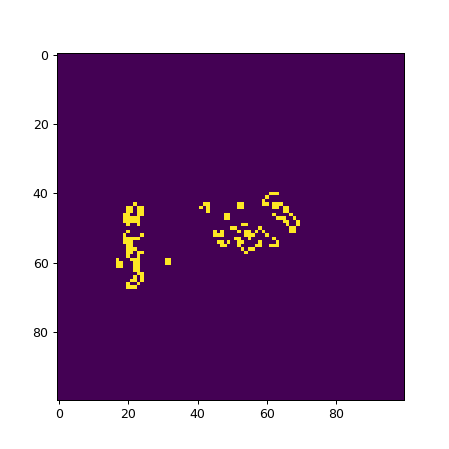

In [10]:
initial = np.full((100, 100), False)

initial[52:55,53] = True
initial[53,52] = True
initial[52,54] = True

states = [initial]
board = initial
for i in range(500):
    updated = update_board(board)
    states.append(np.copy(updated))
    board = updated

fig,ax = plt.subplots()
fig.set_size_inches(5,5)

im = ax.imshow(states[0])

def animate(frame_number):
    im.set_data(states[frame_number])
    return im
    
animation = anim.FuncAnimation(fig, animate, frames=len(states), interval=100)
plt.show()

An easy way to get a sense of the diversity generated by Life's rules is to begin with a random board state.  **Generate a board of size 100x100 with each pixel either alive or dead with 50% probability**.  (A useful function for doing this might be numpy.random.randint).  **Run the game for 1000 iterations.  Write a characterization of the types of patterns that appear.  As a guide, there is a common vernacular for characterizing these different patterns: still life (stable and non-changing patterns), oscillators (you've already seen one example with the horizontal/vertical line), and gliders.  Describe some pixel patterns that fall into each of these categories.**

**Findings**

When running the randomly filled board below, there's many sustained patterns that seem to remain permanently. Figure 1 is of stable non changing patterns. Figurre 3 is of a glider which moves in a 45 angle direction until it collides with other cells. ![image.png] 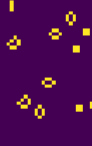!
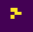

<IPython.core.display.Javascript object>


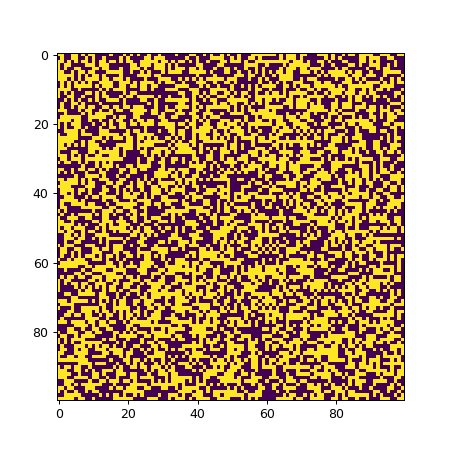

In [11]:
sample_arr = [True, False]
# create a board with random true false values
initial = np.random.choice(sample_arr, size=(100,100))

states = [initial]
board = initial
for i in range(500):
    updated = update_board(board)
    states.append(np.copy(updated))
    board = updated

fig,ax = plt.subplots()
fig.set_size_inches(5,5)

im = ax.imshow(states[0])

def animate(frame_number):
    im.set_data(states[frame_number])
    return im
    
animation = anim.FuncAnimation(fig, animate, frames=len(states), interval=100)
plt.show()

#generateSimulation(board)

In [19]:
np.sum(states[-1])

469

Next, let's ask an analytical question: Given the randomized board state above, does the total number of live pixels ever stabilize?  Stated another way, if I ran the simulation above 100 times, and queried the number of live pixels on the board at $t=1000$, would they be similar each time?  **Devise a way to address this question.  Write a short statement with your conclusion, and generate one figure using matplotlib that supports your analysis**.

**Statement**
They would be different each time, though the boards are generated randomly the placement can make the outcome very different due to how fragile stable shapes are. My way to address this question is to generate 100 simulations and count the cells at t=1000. Below is a plot of the cellCounts and it seems to support my thoughts. 

In [20]:
# run this simulation 100 times, get a list of cells alive when t=1000
steps = 1000
cellCounts = []
simulations = 100

for i in range(simulations):

    sample_arr = [True, False]
    # create a board with random true false values
    initial = np.random.choice(sample_arr, size=(100,100))

    states = [initial]
    board = initial
    for i in range(steps):
        updated = update_board(board)
        states.append(np.copy(updated))
        board = updated
    cellCounts.append(np.sum(states[-1]))

<IPython.core.display.Javascript object>


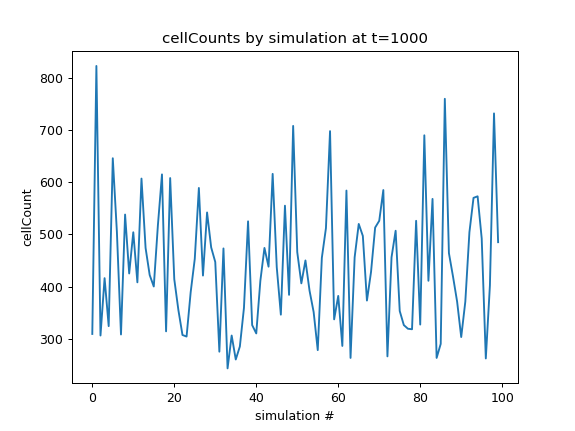

In [35]:
x = np.arange(0,100)
plt.plot(x,cellCounts)
plt.title('cellCounts by simulation at t=1000')
plt.ylabel('cellCount')
plt.xlabel('simulation #')
plt.show()

Finally, one aspect of Life that I find interesting is the fragility of the rule set.  **Make some simple modification to the rules.  Write a short statement describing what you changed and how it affected the dynamics of the system.**

**Statement**
My new rules are:
- If a cell is alive and it is near 1 or 3 alive cells, that cell remains alive
- If a cell is dead and has 5 nearby alive cells, it becomes alive

These rules are more strict, and doesn't allow for sustained patterns with movement. Within a few steps the board becomes static.

In [36]:
# create a update function with different rules
def update_board(S):
    sz = len(S)
    S_new = np.full((sz, sz), False)
    S = np.vstack((S[sz-1,:],S,S[0,:]))
    S = np.hstack((S[:,sz-1].reshape(sz+2,1), S, S[:,0].reshape(sz+2,1)))
    for i in range(1,sz+1):
        for j in range(1,sz+1):
            count = 0
            for cell in np.nditer(S[i-1:i+2, j-1:j+2]):
                 if cell:
                      count += 1
            if S[i,j]:
                count -= 1
                if count == 1 or count == 3:
                    S_new[i-1,j-1] = True
            elif count == 5:
                    S_new[i-1,j-1] = True
    return S_new

<IPython.core.display.Javascript object>


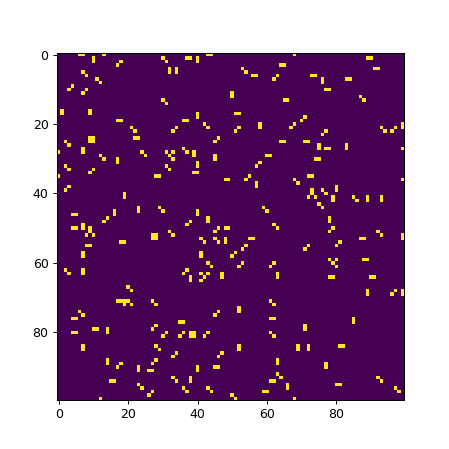

In [39]:
sample_arr = [True, False]
# create a board with random true false values
initial = np.random.choice(sample_arr, size=(100,100))

states = [initial]
board = initial
for i in range(500):
    updated = update_board(board)
    states.append(np.copy(updated))
    board = updated

fig,ax = plt.subplots()
fig.set_size_inches(5,5)

im = ax.imshow(states[0])

def animate(frame_number):
    im.set_data(states[frame_number])
    return im
    
animation = anim.FuncAnimation(fig, animate, frames=len(states), interval=100)
plt.show()

#generateSimulation(board)